In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

 **Loading the Dataset**

In [235]:
df = pd.read_csv('Bitcoin_Data.csv')

**Exploration & Cleaning**

In [236]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [237]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [239]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1792,1792,1792,1792,1792,1792,1792
unique,1792,1791,1792,1791,1792,1792,1792
top,"Sep 12, 2024","7,410.45","58,534.36","27,375.60","58,127.01","58,127.01","33,835,707,949"
freq,1,2,1,2,1,1,1


In [240]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [241]:
df.duplicated().sum()

0

In [242]:
duplicates = df[df.duplicated(subset=['Date', 'Open', 'Close'])]
duplicates.head()


,Date,Open,High,Low,Close,Adj Close,Volume


In [243]:
df_cleaned = df.drop_duplicates()


In [244]:
df_cleaned.duplicated().sum()

0

In [245]:
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [246]:
df_cleaned.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


Till this step we got the info regarding the dataset and we now know that their aren't any missing vals and also the duplicated vals have been removed from the dataset


In [247]:
#updating the orignal dataset
df = df_cleaned


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [250]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [251]:
#defining num_cols before hand to reuse it again instead of typing again
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [252]:
# Remove commas from numeric vals and convert cols to float
#as all the cols are in object(str) datatype so converting to string
for col in num_cols:
    df[col] = df[col].str.replace(',', '').astype(float)



In [253]:
df.info() #checking again after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1792 non-null   object 
 1   Open       1792 non-null   float64
 2   High       1792 non-null   float64
 3   Low        1792 non-null   float64
 4   Close      1792 non-null   float64
 5   Adj Close  1792 non-null   float64
 6   Volume     1792 non-null   float64
dtypes: float64(6), object(1)
memory usage: 98.1+ KB


In [254]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


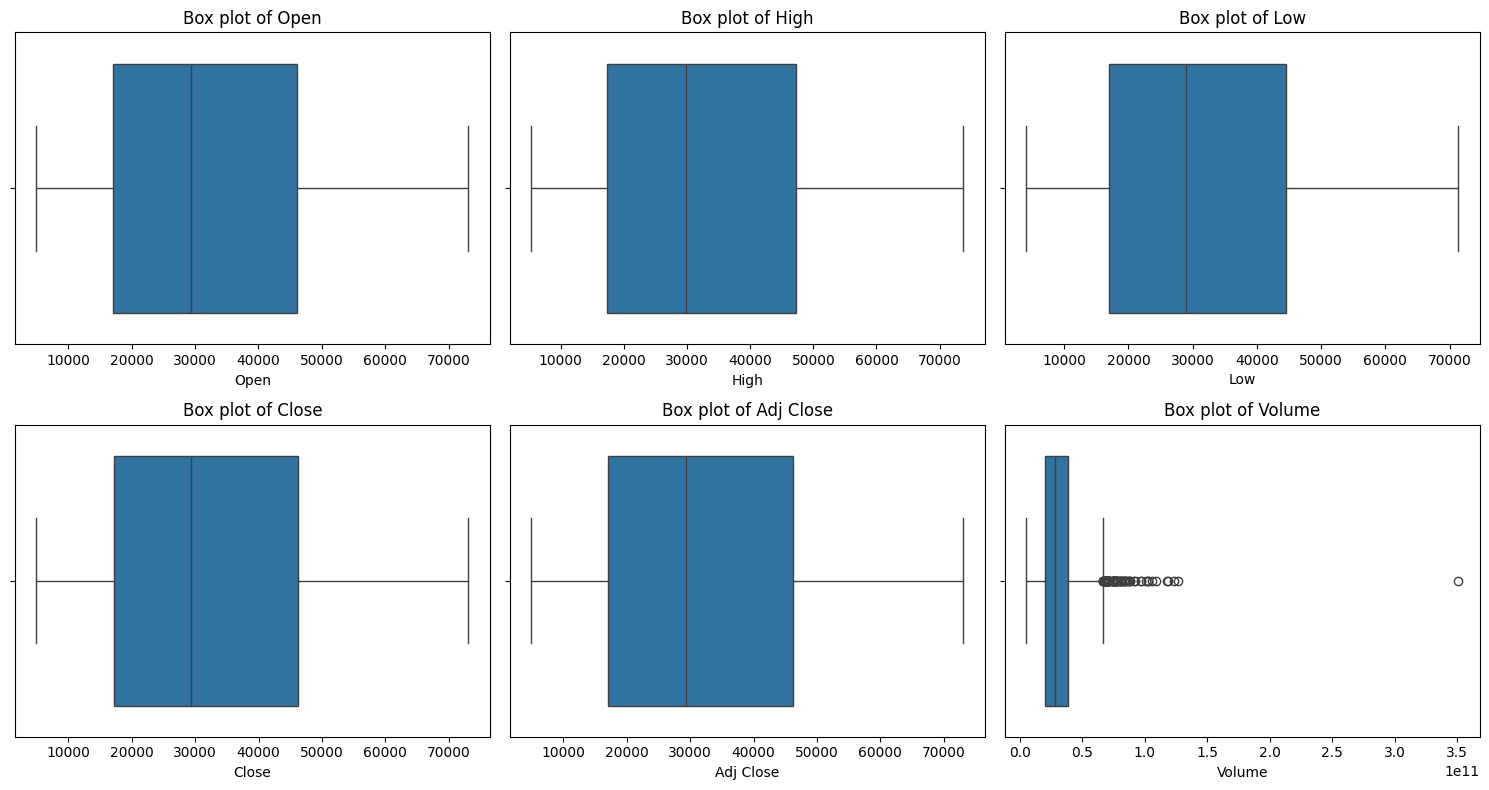

In [255]:
#plotting to visualize before removing outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()

plt.show()


In [256]:
#removing outliers
#using IQR because of price and volume data


Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]





In [257]:
print(df_cleaned.shape)

(1717, 7)


In [258]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [259]:
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [260]:
df = df_cleaned

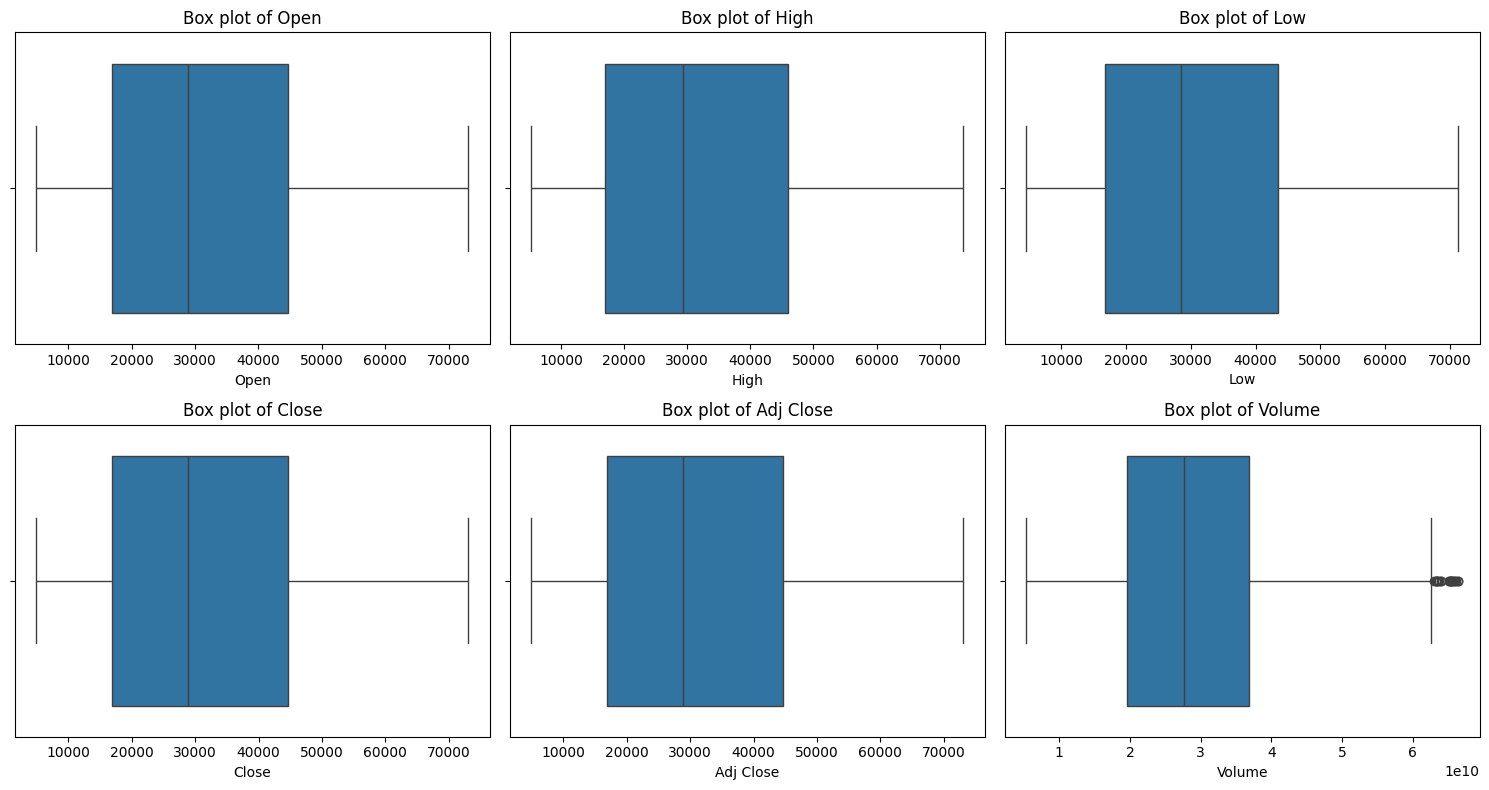

In [261]:
#plotting to visualize after removing outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()

plt.show()


**Transformation**

In [262]:
# Convert Date col to datetime64
df['Date']=df['Date'].astype('datetime64[ns]')

#already converted rest of the cols as they had to be done before

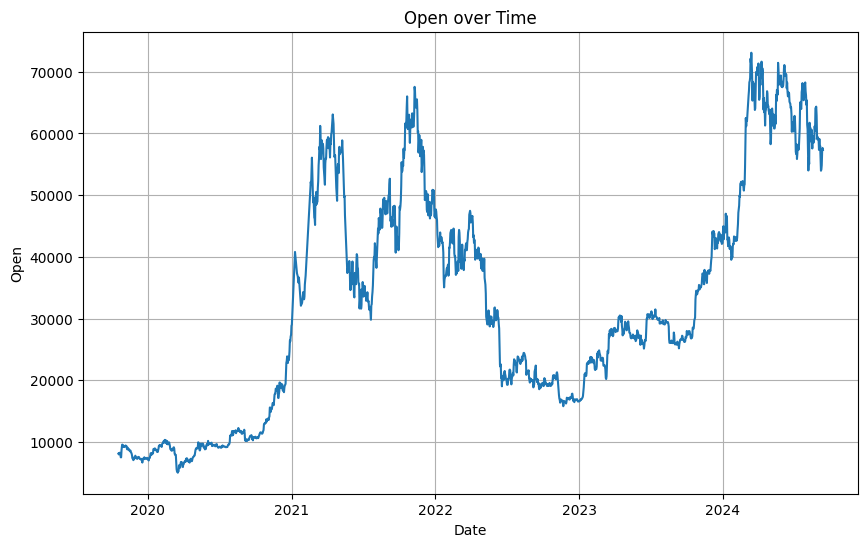

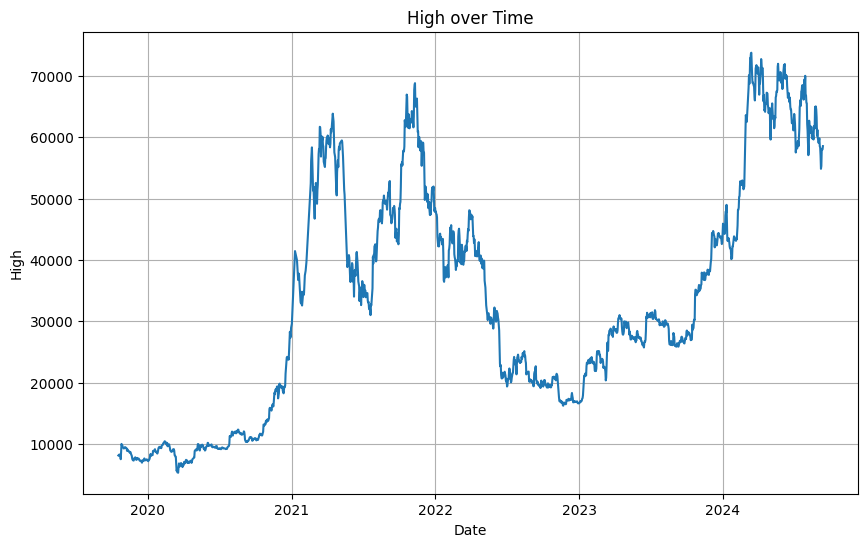

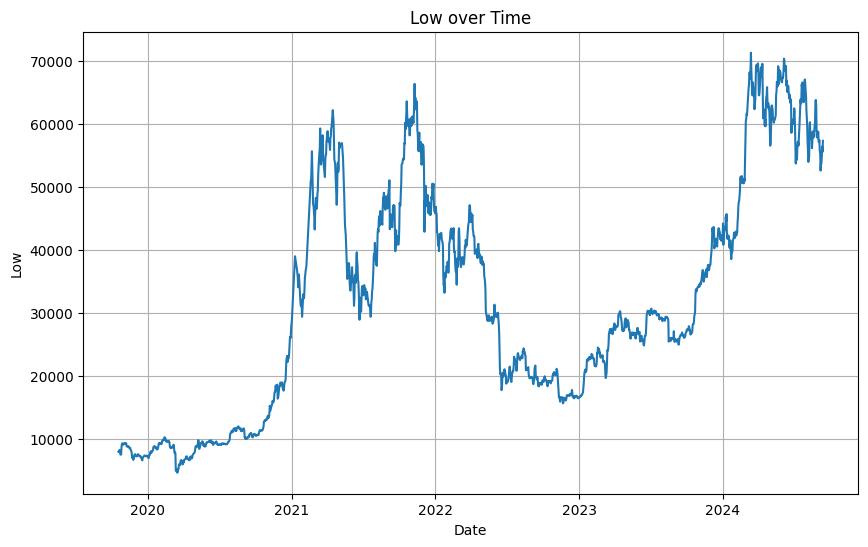

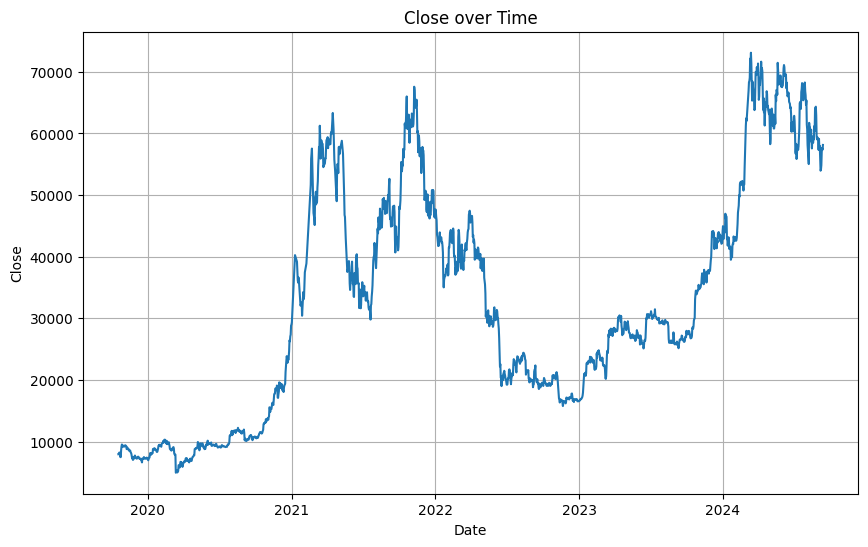

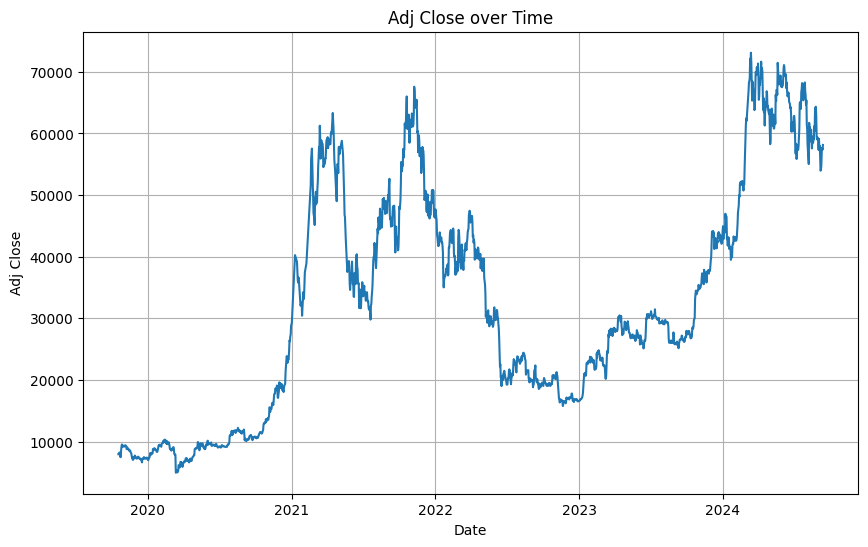

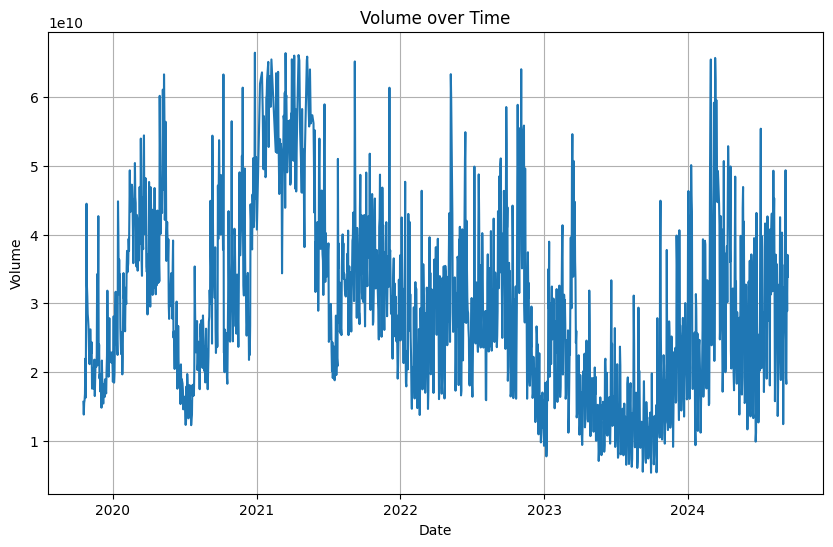

In [263]:

for col in num_cols:
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[col])
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.title(f'{col} over Time')
  plt.grid(True)
  plt.show()

In [269]:
#Normalization
#using standard scaler to make the data centerlized
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(
    df[num_cols]
    )


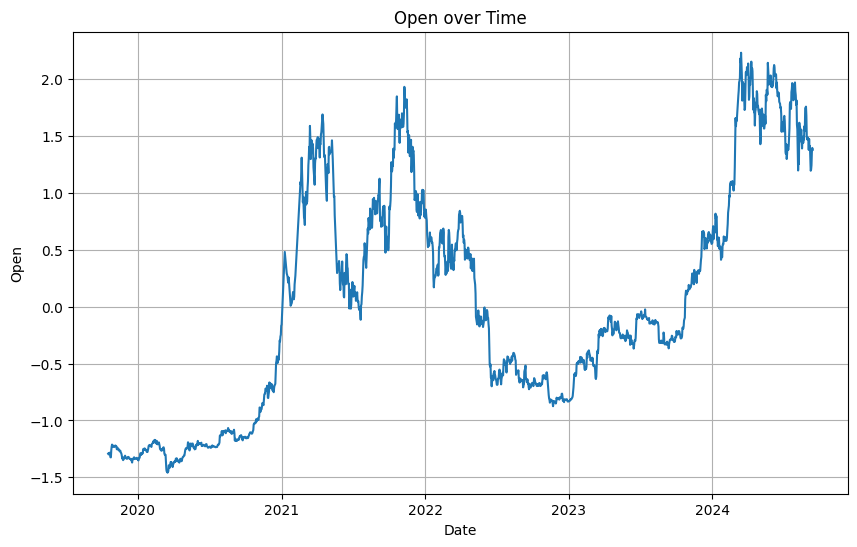

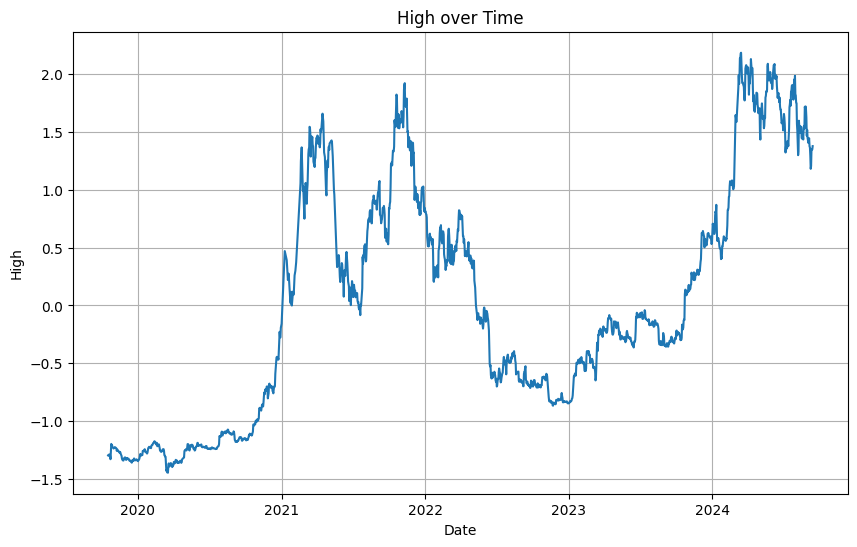

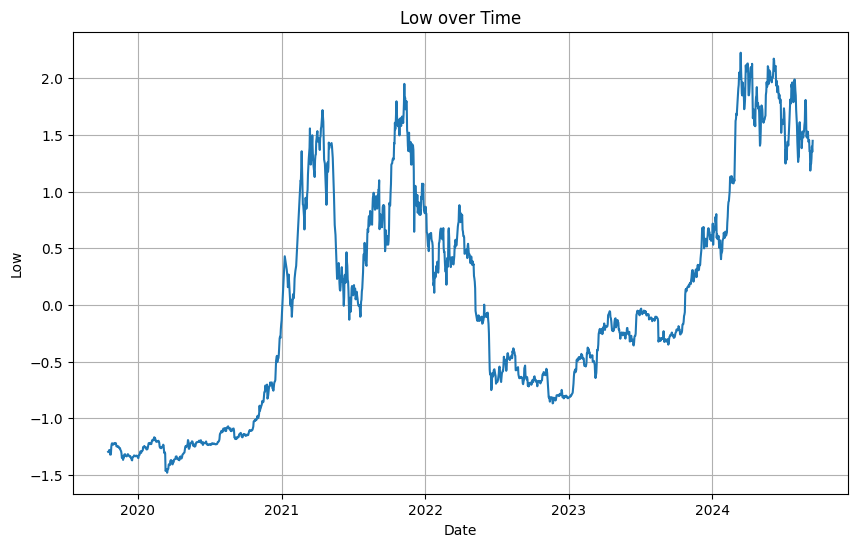

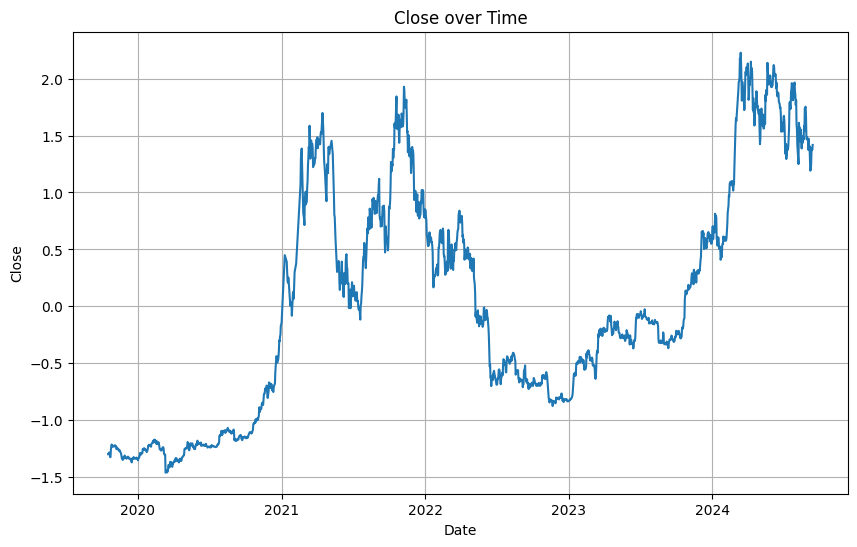

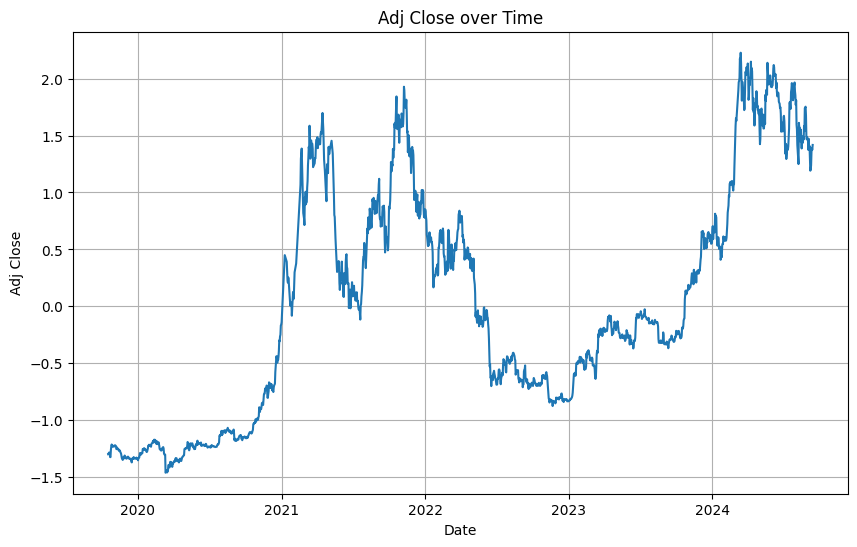

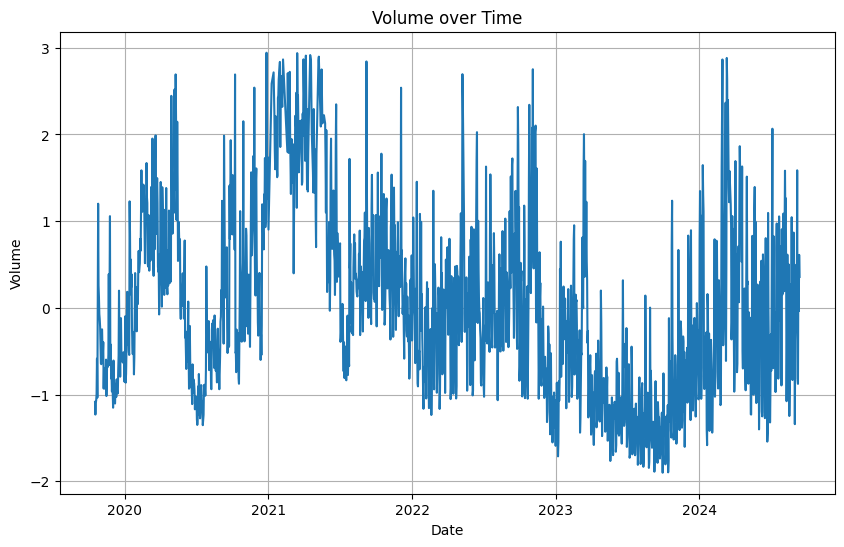

In [270]:

for col in num_cols:
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[col])
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.title(f'{col} over Time')
  plt.grid(True)
  plt.show()

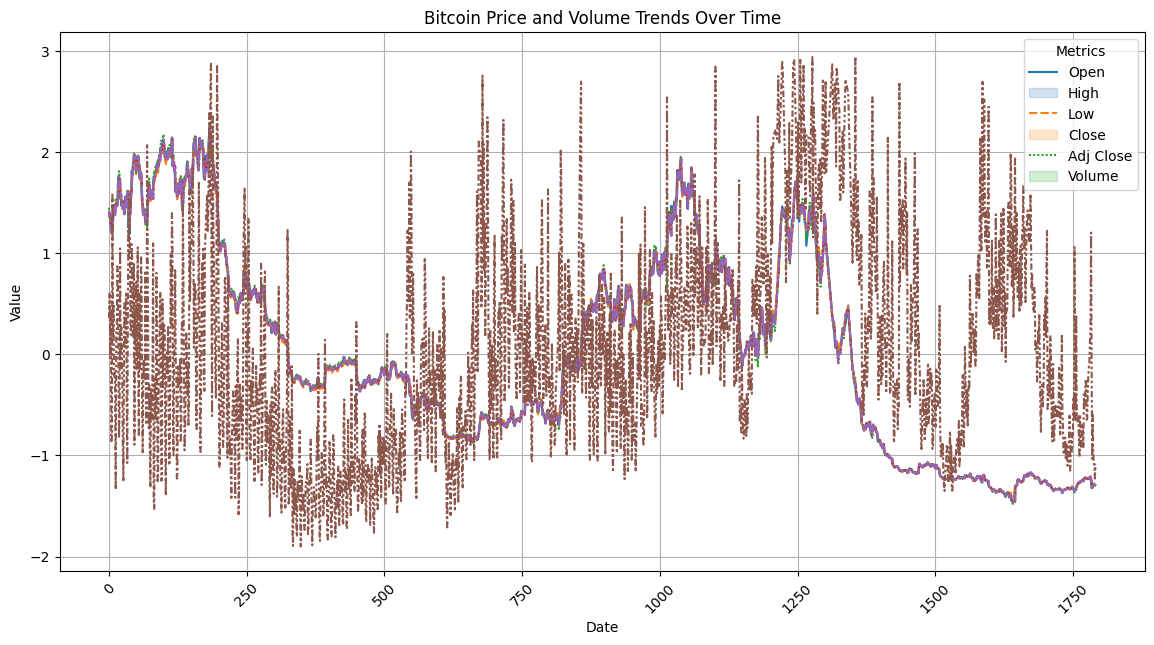

In [274]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=df[num_cols], palette='tab10')

plt.title('Bitcoin Price and Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(num_cols, title='Metrics')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [280]:
df.to_csv('BTC_cleaned_data.csv', index=False)